## Esercizio 12.2

Considerando ancora le immagini delle cifre scritte a mano presenti nel dataset MNIST, possiamo notare che esistono correlazioni spaziali locali tra i pixel. Finora abbiamo rappresentato i dati del MNIST come vettori 1D di lunghezza 28x28. Tuttavia, potremmo ottenere risultati migliori sfruttando le caratteristiche spaziali, ad esempio prendendo in considerazione le correlazioni tra i pixel e l'invarianza traslazionale durante l'elaborazione delle immagini.

Queste operazioni possono essere fatte utilizzando i convolutional layers in Keras.

Modifichiamo quindi il codice dell'esercizio 12.1, modificando l'architettura della rete attraverso lì'implementazione dei convolutional layers.
Per farlo, mi servirò di layers come:
1. Conv2D: Il layer convoluzionale, basandosi sul layer precedente, produce un'ulteriore layer 2D.
2. Dropout: spegne a caso alcuni neuroni per rendere più difficile l'apprendimento e irrobustire il modello;
3. MaxPooling2D: il layer convoluzionale riduce l'immagine in input selezionando il valore massimo di un pixel all'interno di una finestra di dimensioni fissate.
4. Flatten: appiattisce l'input, facendo passare da 2D a una 1D (a questo punto si strutturare l'architettura con layer di tipo dense)
5. Soft-max: viene applicato alla fine, per fornire output netti.

Alleniamo il modello così strutturato per 20 epoche.

In [24]:
import os
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

In [25]:
from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# cast floats to single precision
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

In [26]:
# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples


In [27]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam
from keras.layers import Flatten, Conv2D, MaxPooling2D

def create_CNN():
    # instantiate model
    model = Sequential()
    model.add(Conv2D(10, kernel_size=(5, 5),            # add first convolutional layer with 10 filters (dimensionality of output space)
                     activation='relu',
                     input_shape=input_shape))          # Keras SEquential Model can infer the correct input/output dimensions of other layers
    model.add(Dropout(0.5))                             # Dropout, spegne alcuni neuroni, con rate (0.5)
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())                                # Moving towards a standard flat layer in the final part
    model.add(Dense(30, activation = 'relu'))
    model.add(Dense(num_classes, activation='softmax')) # Softmax in uscita per un risutlato più netto possibile


    
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='adam',
                  metrics=['acc'])
    return model

In [28]:
# training parameters
batch_size = 32
epochs = 20

# create the deep conv net
model_CNN=create_CNN()

# train CNN
history = model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

# evaliate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2107 - acc: 0.9370 - val_loss: 0.1088 - val_acc: 0.9772
Epoch 2/20
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0858 - acc: 0.9738 - val_loss: 0.0819 - val_acc: 0.9804
Epoch 3/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0669 - acc: 0.9797 - val_loss: 0.0614 - val_acc: 0.9847
Epoch 4/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0538 - acc: 0.9832 - val_loss: 0.0573 - val_acc: 0.9855
Epoch 5/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0474 - acc: 0.9848 - val_loss: 0.0530 - val_acc: 0.9857
Epoch 6/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0406 - acc: 0.9868 - val_loss: 0.0505 - val_acc: 0.9857
Epoch 7/20
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0372 - acc: 0.9876 - val_loss: 0.0460 - val_acc: 0.9858
Epoch 8/20
1875/1875 [==============================] 

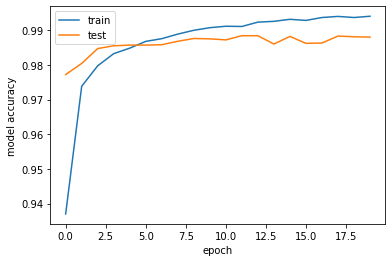

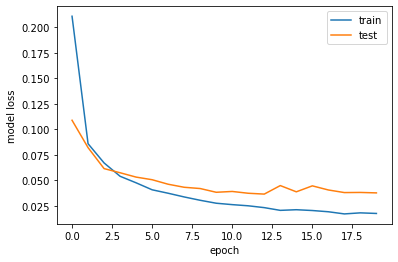

In [29]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [30]:
predictions = model_CNN.predict(X_test)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

313/313 [==============================] - 1s 2ms/step


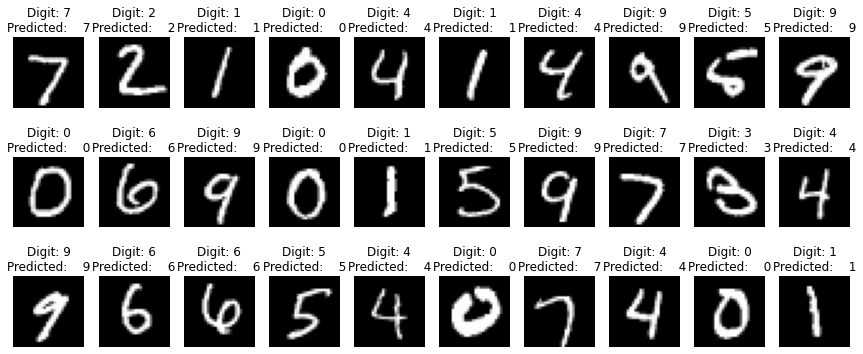

In [31]:
plt.figure(figsize=(15, 15)) 
for i in range(30):    
    ax = plt.subplot(7, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

Tutte le cifre vengono riconosciute

## Esercizio 12.3

In questa ultima sezione uso la rete neurale appena allenata per riconoscere cifre da me scritte a mano. 

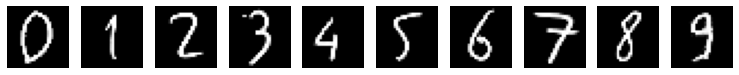

In [32]:
from PIL import Image
import os

data = []
plt.figure(figsize=(13,10))

for l in range(10):
    index = str(l)
    digit_filename = index+"_test.png"
    digit_in = Image.open(digit_filename).convert('L')

    ydim, xdim = digit_in.size
    pix=digit_in.load();
    data_back = np.zeros((xdim, ydim))
    for j in range(ydim):
        for i in range(xdim):
            data_back[i,j]=pix[j,i]/255
    data.append(data_back)

    ax = plt.subplot(6, 10, l + 1)
    plt.imshow(data[l], cmap='gray')
    plt.axis('off')
plt.show()

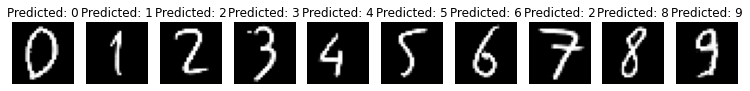

In [33]:
plt.figure(figsize=(13,10))

for l in range(10):
    data1 = data[l].reshape(1, xdim, ydim, 1)  # Reshape to match CNN input shapeprint(data.shape)
    pred_0 = model_CNN.predict(data1, verbose=0)

    data1 = data1.reshape(xdim,ydim)


    ax = plt.subplot(3, 10, l + 1)
    plt.imshow(data1, cmap='gray')    
    plt.title("Predicted: {}".format(np.argmax(pred_0)))
    plt.axis('off') 
    
plt.show()

La rete ha riconosciuto nove cifre su dieci. Il risultato può essere ritenuto buono perché il 7, per quanto possa sembrare scritto bene, è piuttosto diverso dai 7 presenti in MINST che non presentano la stanghetta a metà.